# Models Evaluation

In [29]:
import pandas as pd
import numpy as np
import statistics as stat
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from imblearn.over_sampling import RandomOverSampler
from sklearn import tree
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ranksums

pd.options.mode.chained_assignment = None 


ad =  pd.read_csv('dataset.csv')

### Grouping CDR 2.0 to 1.0

In [30]:
ad.loc[ad["CDR"] == 2,"CDR"] = 1

### Training and Testing Sets

In [31]:
kf = KFold(n_splits=10, random_state=None) #10 folds cross validation
oversample = RandomOverSampler(sampling_strategy='minority', random_state =4)

In [32]:
train = []
test = []

for train_index, test_index in kf.split(ad):
    train.append(train_index)
    test.append(test_index)

### Splitting into independent and dependent variables

In [33]:
X_LR = ad.iloc[:,[4,7,10,13]]
y_LR = ad.iloc[:,[11]]

y_LR=y_LR.astype(str)


In [34]:
X_LR.head()

,MR Delay,Age,MMSE,nWBV
0,0,87,27.0,0.696
1,457,88,30.0,0.681
2,0,75,23.0,0.736
3,560,76,28.0,0.713
4,1895,80,22.0,0.701


### Normalizing the variables

In [35]:
def normalize(x):
    return (x-min(x))/((max(x)) - min(x))

In [36]:
X_LR.loc[:,['MMSE']]=pd.DataFrame(normalize(X_LR['MMSE']))

### Defining a function to evaluate the accuracy, precision and, recall for the Linear Regression Model

In [37]:
avg_MMSE = X_LR['MMSE'].mean()

In [38]:
def eval(fold):
    regressor = LinearRegression()
    acc_score = []
    precise_score = []
    recall = []

    X_LR_train, X_LR_test = X_LR.iloc[train[fold],:], X_LR.iloc[test[fold],:]
    y_LR_train, y_LR_test = y_LR.iloc[train[fold],:], y_LR.iloc[test[fold],:]

    X_LR_train, y_LR_train = oversample.fit_resample(X_LR_train, y_LR_train)

    X_LR_train.loc[:,'MMSE'] = X_LR_train.loc[:,'MMSE'].fillna(avg_MMSE)

    y_LR_train =  y_LR_train.astype(float)
    y_LR_train.loc[:,'CDR'] =  y_LR_train.loc[:,'CDR'].fillna(stat.median( y_LR_train['CDR']))
    y_LR_train=  y_LR_train.astype(str)



    #Complete case for test set
    X_LR_test["CDR"] = y_LR_test
    X_LR_test = X_LR_test.dropna(axis = 0, how='any')

    y_LR_test = X_LR_test["CDR"]
    X_LR_test=X_LR_test.loc[:,X_LR_test.columns!='CDR']

    regressor.fit(X_LR_train,y_LR_train)

    y_LR_pred = regressor.predict(X_LR_test)
    new_y_LR_pred = np.around(y_LR_pred * 2.0) / 2.0
    new_y_LR_pred = new_y_LR_pred.astype(str)
    y_LR_test = y_LR_test.astype(str)

    acc = accuracy_score(y_LR_test, new_y_LR_pred)
    acc_score.append(acc)

    precise = precision_score(y_LR_test, new_y_LR_pred, average='macro',zero_division=1)
    precise_score.append(precise)

    rec = recall_score(y_LR_test, new_y_LR_pred, average = 'macro', zero_division = 1)
    recall.append(rec)
        
    return acc_score, precise_score, recall

### Result for the Linear Regression

In [39]:
LR0 = eval(0)
LR1 = eval(1)
LR2 = eval(2)
LR3 = eval(3)
LR4 = eval(4)
LR5 = eval(5)
LR6 = eval(6)
LR7 = eval(7)
LR8 = eval(8)
LR9 = eval(9)

print("Accuracy Score")
LR_acc = pd.DataFrame([LR0[0] , LR1[0] , LR2[0], LR3[0] ,LR4[0], LR5[0] , LR6[0], LR7[0], LR8[0], LR9[0]], columns=["Accuracy"])

print(LR0[0] , LR1[0] , LR2[0], LR3[0] ,LR4[0], LR5[0] , LR6[0], LR7[0], LR8[0], LR9[0])

print("Average of Accuracy Score is: ", LR_acc["Accuracy"].mean())

print("***********************************************")

print("Precision Score")
LR_pre = pd.DataFrame([LR0[1] , LR1[1] , LR2[1], LR3[1] ,LR4[1], LR5[1] , LR6[1], LR7[1], LR8[1], LR9[1]], columns=["Precision"])

print(LR0[1] , LR1[1] , LR2[1], LR3[1] ,LR4[1], LR5[1] , LR6[1], LR7[1], LR8[1], LR9[1])

print("Average of Precision Score is: ", LR_pre["Precision"].mean())

print("***********************************************")

print("Recall Score")
LR_rec = pd.DataFrame([LR0[2] , LR1[2] , LR2[2], LR3[2] ,LR4[2], LR5[2] , LR6[2], LR7[2], LR8[2], LR9[2]], columns=["Recall"])

print(LR0[2] , LR1[2] , LR2[2], LR3[2] ,LR4[2], LR5[2] , LR6[2], LR7[2], LR8[2], LR9[2])

print("Average of Precision Score is: ", LR_rec["Recall"].mean())

Accuracy Score
[0.4473684210526316] [0.7368421052631579] [0.5263157894736842] [0.3783783783783784] [0.5405405405405406] [0.5675675675675675] [0.5405405405405406] [0.6486486486486487] [0.5405405405405406] [0.7142857142857143]
Average of Accuracy Score is:  0.5641028246291404
***********************************************
Precision Score
[0.4801587301587302] [0.6127450980392157] [0.3986842105263158] [0.32307692307692304] [0.782051282051282] [0.7269841269841271] [0.5570175438596491] [0.6621212121212121] [0.6535087719298246] [0.6293297345928924]
Average of Precision Score is:  0.5825677633340172
***********************************************
Recall Score
[0.4388888888888889] [0.8202020202020202] [0.7377777777777778] [0.3093434343434343] [0.6166666666666667] [0.5757575757575758] [0.557142857142857] [0.6573529411764706] [0.5634920634920635] [0.8105263157894737]
Average of Precision Score is:  0.6087150541237228


Text(0.5, 0, 'Accuracy Score')

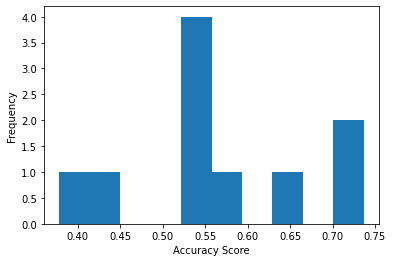

In [40]:
plt.hist(LR_acc)
plt.ylabel('Frequency')
plt.xlabel('Accuracy Score')

Text(0.5, 0, 'Precision Score')

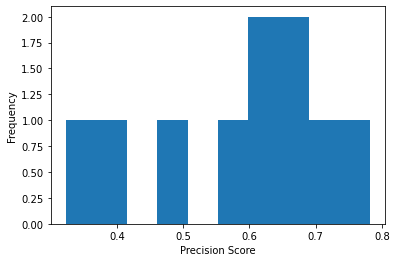

In [41]:
plt.hist(LR_pre)
plt.ylabel('Frequency')
plt.xlabel('Precision Score')

Text(0.5, 0, 'Recall Score')

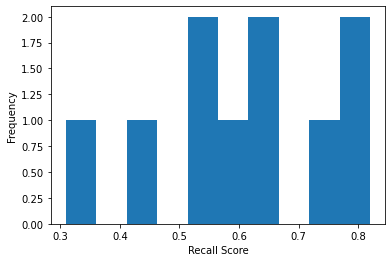

In [42]:
plt.hist(LR_rec)
plt.ylabel('Frequency')
plt.xlabel('Recall Score')

### Splitting the variables into dependent and independent vairables

In [43]:
X_tree = ad.iloc[:,[3,4,9,11,14]]
y_tree = ad.iloc[:,[2]]

In [44]:
X_tree.head()

,Visit,MR Delay,SES,CDR,ASF
0,1,0,2.0,0.0,0.883
1,2,457,2.0,0.0,0.876
2,1,0,NaN,0.5,1.046
3,2,560,NaN,0.5,1.010
4,3,1895,NaN,0.5,1.034


### Defining the function to evaluate the accuracy, precision, and recall for the decision tree model

In [45]:
t_med_SES = stat.median(X_tree['SES'])
#t_avg_MMSE = X_tree['MMSE'].mean()

In [46]:
def tree_eval(fold):
    clf = tree.DecisionTreeClassifier()
    acc_score = []
    precise_score = []
    recall = []

    X_tree_train, X_tree_test = X_tree.iloc[train[fold],:], X_tree.iloc[test[fold],:]
    y_tree_train, y_tree_test = y_tree.iloc[train[fold],:], y_tree.iloc[test[fold],:]

    X_tree_train, y_tree_train = oversample.fit_resample(X_tree_train, y_tree_train)
    
    X_tree_train.loc[:,'SES'] = X_tree_train.loc[:,'SES'].fillna(t_med_SES)
    #X_tree_train.loc[:,'MMSE'] = X_tree_train.loc[:,'MMSE'].fillna(t_avg_MMSE)


    #Complete case for test set
    X_tree_test["Group"] = y_tree_test
    X_tree_test = X_tree_test.dropna(axis = 0, how='any')

    y_tree_test = X_tree_test["Group"]
    X_tree_test=X_tree_test.loc[:,X_tree_test.columns!='Group']

    clf.fit(X_tree_train,y_tree_train)
    y_tree_pred = clf.predict(X_tree_test)

    acc = accuracy_score(y_tree_test, y_tree_pred)
    acc_score.append(acc)

    precise = precision_score(y_tree_test, y_tree_pred, average='macro',zero_division=1)
    precise_score.append(precise)

    rec = recall_score(y_tree_test, y_tree_pred, average = 'macro', zero_division = 1)
    recall.append(rec)
        
    return acc_score, precise_score, recall

### Metrics of the decision tree model

In [47]:
Tree0 = tree_eval(0)
Tree1 = tree_eval(1)
Tree2 = tree_eval(2)
Tree3 = tree_eval(3)
Tree4 = tree_eval(4)
Tree5 = tree_eval(5)
Tree6 = tree_eval(6)
Tree7 = tree_eval(7)
Tree8 = tree_eval(8)
Tree9 = tree_eval(9)

print("Accuracy Score")
Tree_acc = pd.DataFrame([Tree0[0] , Tree1[0] , Tree2[0], Tree3[0] ,Tree4[0], Tree5[0] , Tree6[0], Tree7[0], Tree8[0], Tree9[0]], columns=["Accuracy"])

print(Tree0[0] , Tree1[0] , Tree2[0], Tree3[0] ,Tree4[0], Tree5[0] , Tree6[0], Tree7[0], Tree8[0], Tree9[0])

print("Average of Accuracy Score is: ", Tree_acc["Accuracy"].mean())

print("***********************************************")

print("Precision Score")
Tree_pre = pd.DataFrame([Tree0[1] , Tree1[1] , Tree2[1], Tree3[1] ,Tree4[1], Tree5[1] , Tree6[1], Tree7[1], Tree8[1], Tree9[1]], columns=["Precision"])

print(Tree0[1] , Tree1[1] , Tree2[1], Tree3[1] ,Tree4[1], Tree5[1] , Tree6[1], Tree7[1], Tree8[1], Tree9[1])

print("Average of Precision Score is: ", Tree_pre["Precision"].mean())

print("***********************************************")

print("Recall Score")
Tree_rec = pd.DataFrame([Tree0[2] , Tree1[2] , Tree2[2], Tree3[2] ,Tree4[2], Tree5[2] , Tree6[2], Tree7[2], Tree8[2], Tree9[2]], columns=["Recall"])

print(Tree0[2] , Tree1[2] , Tree2[2], Tree3[2] ,Tree4[2], Tree5[2] , Tree6[2], Tree7[2], Tree8[2], Tree9[2])

print("Average of Precision Score is: ", Tree_rec["Recall"].mean())

Accuracy Score
[0.8125] [0.868421052631579] [0.8421052631578947] [0.8285714285714286] [0.9459459459459459] [0.9142857142857143] [0.8285714285714286] [0.6756756756756757] [0.9428571428571428] [0.75]
Average of Accuracy Score is:  0.8408933651696809
***********************************************
Precision Score
[0.7538011695906434] [0.7222222222222222] [0.7341269841269841] [0.6196969696969696] [0.6666666666666666] [0.8605072463768115] [0.6041666666666666] [0.611111111111111] [0.6666666666666666] [0.6416666666666667]
Average of Precision Score is:  0.6880632369791408
***********************************************
Recall Score
[0.7232456140350877] [0.7166666666666667] [0.7847222222222222] [0.6086956521739131] [0.9637254901960784] [0.8250000000000001] [0.6041666666666666] [0.6574074074074074] [0.9682539682539683] [0.619281045751634]
Average of Precision Score is:  0.7471164733373644


Text(0.5, 0, 'Accuracy Score')

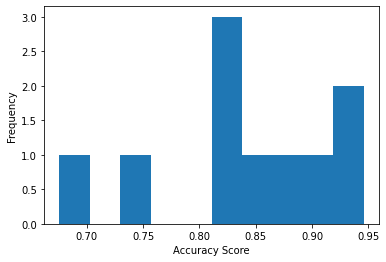

In [48]:
plt.hist(Tree_acc)
plt.ylabel('Frequency')
plt.xlabel('Accuracy Score')

Text(0.5, 0, 'Precision Score')

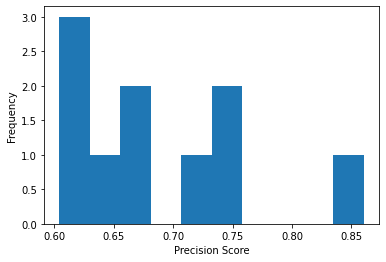

In [49]:
plt.hist(Tree_pre)
plt.ylabel('Frequency')
plt.xlabel('Precision Score')

Text(0.5, 0, 'Recall Score')

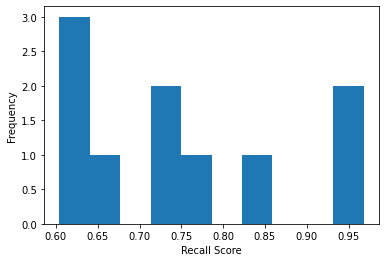

In [50]:
plt.hist(Tree_rec)
plt.ylabel('Frequency')
plt.xlabel('Recall Score')

### Null Hypothesis: The median of the decision tree's accuracy is not greater than the liner regression model's

In [51]:
ranksums(Tree_acc, LR_acc, alternative = 'greater')

RanksumsResult(statistic=3.6284589408885815, pvalue=0.00014255904181580633)

### Null Hypothesis: The median of the decision tree's precision is not greater than the liner regression model's

In [52]:
ranksums(Tree_pre, LR_pre, alternative = 'greater')

RanksumsResult(statistic=1.5874507866387544, pvalue=0.05620529232768185)

### Null Hypothesis: The median of the decision tree's recall is not greater than the liner regression model's

In [53]:
ranksums(Tree_rec, LR_rec, alternative = 'greater')

RanksumsResult(statistic=1.889822365046136, pvalue=0.02939086067767943)